<font color = red>**QBS Competition 1 - Report**</font> 

Step 1. Read data and Check what is in data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv') 

In [4]:
def fill_in_null(column, replace_item):
    for (i, item) in enumerate( column.isnull() ):
        if(item == True):
            column[i] = replace_item

def normalise(column):
    mean_value = column.mean()
    std_value = column.std()
    for i in range(len(column)):
        column[i] = (column[i]  - mean_value) / std_value

In [6]:
"""f, axes = plt.subplots(2, 1, figsize=(50, 20))
#age_pic = sns.distplot(train_data.Age, ax=axes[0,0])
workclass_pic = sns.countplot(train_data.Workclass, ax=axes[0])
#occupation_pic = sns.countplot(train_data.Occupation, ax=axes[0,2])
#Capital_Gain_pic = sns.countplot(train_data.Capital_Gain, ax=axes[0,0])
#Capital_Loss_pic = sns.countplot(train_data.Capital_Loss, ax=axes[0,1])
#eduction_pic = sns.countplot(train_data.Education, ax=axes)
#Country_pic = sns.countplot(train_data.Country, ax=axes)
#eduction_pic = sns.barplot(x='Education', y='Target', data=train_data, ax=axis[0])
#eduction_num_pic = sns.barplot(x='Education_Num', y='Target', data=train_data, ax=axis[1])
#fnlwgt_vs_target = sns.barplot(x='fnlwgt', y='Target', data=train_data, ax=axes[3])
#age_vs_target = sns.barplot(x='Age', y='Target',data=train_data, ax=axes[1,0])
workclass_vs_target = sns.barplot(x='Workclass', y='Target',data=train_data, ax=axes[1])
#marriage_vs_target = sns.barplot(x='Martial_Status', y='Target',data=train_data, ax=axes[1,3])
#occupation_vs_target = sns.barplot(x='Occupation', y='Target',data=train_data, ax=axes[1,2])
#Capital_Gain_vs_target = sns.barplot(x='Capital_Gain', y='Target',data=train_data, ax=axes[1,0])
#Capital_Loss_vs_target = sns.barplot(x='Capital_Loss', y='Target',data=train_data, ax=axes[1,1])
#Country_vs_target = sns.barplot(x='Country', y='Target',data=train_data, ax=axes)"""

"f, axes = plt.subplots(2, 1, figsize=(50, 20))\n#age_pic = sns.distplot(train_data.Age, ax=axes[0,0])\nworkclass_pic = sns.countplot(train_data.Workclass, ax=axes[0])\n#occupation_pic = sns.countplot(train_data.Occupation, ax=axes[0,2])\n#Capital_Gain_pic = sns.countplot(train_data.Capital_Gain, ax=axes[0,0])\n#Capital_Loss_pic = sns.countplot(train_data.Capital_Loss, ax=axes[0,1])\n#eduction_pic = sns.countplot(train_data.Education, ax=axes)\n#Country_pic = sns.countplot(train_data.Country, ax=axes)\n#eduction_pic = sns.barplot(x='Education', y='Target', data=train_data, ax=axis[0])\n#eduction_num_pic = sns.barplot(x='Education_Num', y='Target', data=train_data, ax=axis[1])\n#fnlwgt_vs_target = sns.barplot(x='fnlwgt', y='Target', data=train_data, ax=axes[3])\n#age_vs_target = sns.barplot(x='Age', y='Target',data=train_data, ax=axes[1,0])\nworkclass_vs_target = sns.barplot(x='Workclass', y='Target',data=train_data, ax=axes[1])\n#marriage_vs_target = sns.barplot(x='Martial_Status', y='

In [7]:
train_data = train_data.drop(columns="fnlwgt") # it only has little relation to target
test_data = test_data.drop(columns="fnlwgt") 

train_data = train_data.drop(columns="ID")
test_data = test_data.drop(columns="ID")

train_data = train_data.drop(columns="Education")
test_data = test_data.drop(columns="Education")

train_data = train_data.drop(columns="Capital_Loss")
test_data = test_data.drop(columns="Capital_Loss")

x_train_label = train_data["Target"]
train_data = train_data.drop(columns="Target")

In [3]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

ID                   0
Age                  0
Workclass         1849
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1857
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            526
Target               0
dtype: int64

ID                  0
Age                 0
Workclass         950
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        952
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           331
dtype: int64


In [8]:
fill_in_null(train_data.Workclass, "none") 
fill_in_null(train_data.Occupation, "none")
fill_in_null(train_data.Country, "none") 

fill_in_null(test_data.Workclass, "none") 
fill_in_null(test_data.Occupation, "none")
fill_in_null(test_data.Country, "none") 

In [9]:
print(test_data.isnull().sum())
print()
print(train_data.isnull().sum())

Age               0
Workclass         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Hours_per_week    0
Country           0
dtype: int64

Age               0
Workclass         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Hours_per_week    0
Country           0
dtype: int64


In [13]:
train_data.Age = train_data.Age.astype("float64")
#train_data.Education_Num = train_data.Education_Num.astype("float64")
train_data.Hours_per_week = train_data.Hours_per_week.astype("float64")
train_data.Capital_Gain = train_data.Capital_Gain.astype("float64")

test_data.Age = test_data.Age.astype("float64")
#test_data.Education_Num = test_data.Education_Num.astype("float64")
test_data.Hours_per_week = test_data.Hours_per_week.astype("float64")
test_data.Capital_Gain = test_data.Capital_Gain.astype("float64")

In [15]:
normalise(train_data.Age)
#normalise(train_data.Education_Num)
normalise(train_data.Hours_per_week)
normalise(train_data.Capital_Gain)

normalise(test_data.Age)
#normalise(test_data.Education_Num)
normalise(test_data.Hours_per_week)
normalise(test_data.Capital_Gain)

In [18]:
def count_unique(column):
    uni_array = column.unique()
    uni_array = uni_array[uni_array != "none"]
    num_uni = uni_array.size
    return num_uni


## to count category columns num to trans them
num_uni_workclass = count_unique(train_data.Workclass)
num_uni_education_num = count_unique(train_data.Education_Num)
num_uni_martial_status = count_unique(train_data.Martial_Status)
num_uni_occputaion = count_unique(train_data.Occupation)
num_uni_relationship = count_unique(train_data.Relationship)
num_uni_race = count_unique(train_data.Race)
num_uni_sex = count_unique(train_data.Sex)
num_uni_country = count_unique(train_data.Country)


In [19]:
traned_dimesion = 1 + num_uni_workclass + num_uni_education_num + num_uni_martial_status + num_uni_occputaion + num_uni_relationship + num_uni_race + num_uni_sex + 1 + 1 + num_uni_country

import numpy as np

def data_trans(data_to_trans, dimension=traned_dimesion): ##to revise ID part
    result = np.zeros((len(data_to_trans), dimension))
    
    accumulation_to_capitalgain= 1 + num_uni_workclass + num_uni_education_num + num_uni_martial_status + num_uni_occputaion + num_uni_relationship + num_uni_race + num_uni_sex
    accumulation_to_hourperweek= accumulation_to_capitalgain +1
    

    result[:, 0] = data_to_trans.loc[:, "Age"]
    result[:, accumulation_to_capitalgain] = data_to_trans.loc[:,"Capital_Gain"]
    result[:, accumulation_to_hourperweek] = data_to_trans.loc[:, "Hours_per_week"]
    
    for i in range(len(data_to_trans)):
        accumulation = 0
        #result[i,0] = data_to_trans.loc[i,"Age"]    ## to acculate for-loop, we've assigned it out of the loop
        accumulation += 1

        category_workclass = data_to_trans.Workclass.unique()
        category_workclass = np.delete(category_workclass, np.where(category_workclass == "none"))
        for j  in range(num_uni_workclass):
            if (data_to_trans.loc[i,"Workclass"] == category_workclass[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_workclass

        category_education_num = data_to_trans.Education_Num.unique()
        category_education_num = np.delete(category_education_num, np.where(category_education_num == "none"))
        for j  in range(num_uni_education_num):
            if (data_to_trans.loc[i,"Education_Num"] == category_education_num[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_education_num

        category_ms = data_to_trans.Martial_Status.unique()
        category_ms = np.delete(category_ms, np.where(category_ms == "none"))
        for j in range(num_uni_martial_status):
            if (data_to_trans.loc[i,"Martial_Status"] == category_ms[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_martial_status

        
        category_oc = data_to_trans.Occupation.unique()
        category_oc = np.delete(category_oc, np.where(category_oc == "none"))
        for j in range(num_uni_occputaion):
            if (data_to_trans.loc[i,"Occupation"] == category_oc[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_occputaion

        category_rs = data_to_trans.Relationship.unique()
        category_rs = np.delete(category_rs, np.where(category_rs == "none"))
        for j in range(num_uni_relationship):
            if (data_to_trans.loc[i,"Relationship"] == category_rs[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_relationship

        category_race = data_to_trans.Race.unique()
        category_race = np.delete(category_race, np.where(category_race == "none"))
        for j in range(num_uni_race):
            if (data_to_trans.loc[i,"Race"] == category_race[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_race

        category_sex = data_to_trans.Sex.unique()
        category_sex = np.delete(category_sex, np.where(category_sex == "none"))
        for j in range(num_uni_sex):
            if (data_to_trans.loc[i,"Sex"] == category_sex[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_sex

        #result[i,accumulation] = data_to_trans.loc[i,"Capital_Gain"]    ## to acculate for-loop, we've assigned it out of the loop
        accumulation += 1

        #result[i,accumulation] = data_to_trans.loc[i,"Hours_per_week"]    ## to acculate for-loop, we've assigned it out of the loop
        accumulation += 1

        category_country = data_to_trans.Country.unique()
        category_country = np.delete(category_country, np.where(category_country == "none"))
        for j in range(num_uni_country):
            if (data_to_trans.loc[i,"Country"] == category_country[j]):
              result[i,accumulation + j] = 1 
        accumulation += num_uni_country

    return result

In [20]:
x_train = data_trans(train_data)

In [21]:
x_test = data_trans(test_data)

In [22]:
x_train_label = x_train_label.to_numpy()

In [23]:
x_train_label_new = np.zeros((len(x_train_label),2))
for i in range(len(x_train_label)):
    if (x_train_label[i] == 0):
        x_train_label_new[i] = [1,0]
    else:
        x_train_label_new[i] = [0,1]
x_train_label_new = x_train_label_new.astype("int64")

In [24]:
x_train_label_new

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [25]:
"""from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE as smote
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from collections import Counter

#print(len(x_train_label))

print(Counter(x_train_label))



#under_sample = TomekLinks(return_indices=True, ratio='majority')
under_sample = RandomUnderSampler(sampling_strategy=0.16)
over_sample = RandomOverSampler(sampling_strategy=0.155)
#over_sample = smote(sampling_strategy=0.2)

steps = [('o', over_sample), ('u', under_sample)]
pipeline = Pipeline(steps=steps)

x_train_resample, x_train_label_resample = pipeline.fit_resample(x_train, x_train_label)

print(Counter(x_train_label_resample))"""

"from imblearn.over_sampling import RandomOverSampler\nfrom imblearn.over_sampling import SMOTE as smote\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.under_sampling import TomekLinks\nfrom imblearn.pipeline import Pipeline\nfrom collections import Counter\n\n#print(len(x_train_label))\n\nprint(Counter(x_train_label))\n\n\n\n#under_sample = TomekLinks(return_indices=True, ratio='majority')\nunder_sample = RandomUnderSampler(sampling_strategy=0.16)\nover_sample = RandomOverSampler(sampling_strategy=0.155)\n#over_sample = smote(sampling_strategy=0.2)\n\nsteps = [('o', over_sample), ('u', under_sample)]\npipeline = Pipeline(steps=steps)\n\nx_train_resample, x_train_label_resample = pipeline.fit_resample(x_train, x_train_label)\n\nprint(Counter(x_train_label_resample))"

In [26]:
def check_0_1_distribution(label_to_check):
    k_port = 5
    num_each_port = len(label_to_check) // k_port

    for i in range(k_port):
        num_0_num = 0
        num_1_num = 0
        for j in range(i*num_each_port , (i+1)*num_each_port):
            if(label_to_check[j] == 0):
                num_0_num += 1
            else:
                num_1_num += 1
        print(num_0_num, num_1_num, num_1_num/(num_1_num+num_0_num))

In [27]:
check_0_1_distribution(x_train_label_resample)

NameError: name 'x_train_label_resample' is not defined

In [28]:
from numpy.random import shuffle

def randomize_sync(dataset, label):
    temp_concatenate = np.c_[dataset.reshape(len(dataset), -1), label.reshape(len(label), -1)]
    
    #print(temp_concatenate.shape)
    np.random.shuffle(temp_concatenate)
    #print(temp_concatenate.shape)
    random_dataset = temp_concatenate[:, :dataset.size//len(dataset) ]
    random_label = temp_concatenate[:, dataset.size//len(dataset): ]
    return random_dataset, random_label

    
random_x_train_resample, random_x_train_label_resample = randomize_sync(x_train_resample, x_train_label_resample)

check_0_1_distribution(random_x_train_label_resample)

NameError: name 'x_train_resample' is not defined

In [29]:
original_x_set = np.sort(x_train_resample,axis=0)
after_x_set = np.sort(random_x_train_resample,axis=0)

print(np.array_equal(original_x_set, after_x_set)) #to check random do not messy up the array

NameError: name 'x_train_resample' is not defined

In [47]:
from keras import models
from keras import layers
from keras import regularizers

def build_model():
    model = models.Sequential()
    
    model.add(layers.Dense(120, activation="relu", kernel_regularizer = regularizers.l2(0.001), input_shape=(len(x_train[0]),) ) )
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(100, activation="relu", kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(60, activation="relu", kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(24, activation="relu", kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(24, activation="relu", kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(2, activation="softmax", kernel_regularizer = regularizers.l1_l2(0.001)))

    model.compile(optimizer= "rmsprop", loss= "categorical_crossentropy", metrics=["accuracy"])
    
    return model


In [48]:
from sklearn.utils import class_weight
import torch

num_portion = 4
num_val_sameples = len(x_train) // num_portion
num_epochs = 15
all_loss = []
all_val_loss = []
all_acc = []
all_val_acc = []

for i in range(num_portion):
    print("processing fold {} ...".format(i+1))

    val_data = x_train[i*num_val_sameples : (i+1)*num_val_sameples]
    val_label = x_train_label_new[i*num_val_sameples : (i+1)*num_val_sameples]
    
    prartial_x_train = np.concatenate( [ x_train[: i*num_val_sameples], x_train[(i+1)*num_val_sameples: ] ], axis=0)

    prartial_x_train_label = np.concatenate( [ x_train_label_new[: i*num_val_sameples],\
                                                x_train_label_new[(i+1)*num_val_sameples: ] ], axis=0)

    model = build_model()
    class_weights = {0:0.135,1:1}
    "class_weight.compute_class_weight(class_weights_dict, np.unique(y_integers), y_integers)"

    history = model.fit(prartial_x_train, prartial_x_train_label, validation_data=(val_data, val_label), epochs=num_epochs,\
                        batch_size=512, verbose=0, class_weight=class_weights)

    #print(history.history.keys())
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    
    all_loss.append(loss)
    all_val_loss.append(val_loss)
    all_acc.append(acc)
    all_val_acc.append(val_acc)
    

    print(class_weights)
    print("< === portion {} finished === >".format(i+1))
    print()

processing fold 1 ...
{0: 0.135, 1: 1}
< === portion 1 finished === >

processing fold 2 ...
{0: 0.135, 1: 1}
< === portion 2 finished === >

processing fold 3 ...
{0: 0.135, 1: 1}
< === portion 3 finished === >

processing fold 4 ...
{0: 0.135, 1: 1}
< === portion 4 finished === >



In [49]:
average_all_loss = [ np.mean( [loss[i] for loss in all_loss] ) for i in range(num_epochs) ]
average_all_val_loss = [ np.mean( [val_loss[i] for val_loss in all_val_loss] ) for i in range(num_epochs) ]
average_all_acc = [ np.mean( [acc[i] for acc in all_acc] ) for i in range(num_epochs) ]
average_all_val_acc = [ np.mean( [val_acc[i] for val_acc in all_val_acc] ) for i in range(num_epochs) ]

In [50]:
len(average_all_loss)

15

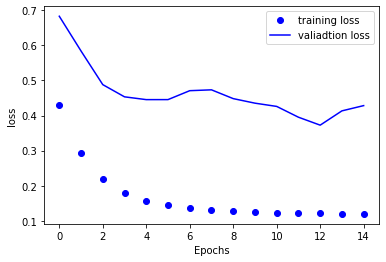

In [70]:
plt.plot(range(len(average_all_loss)), average_all_loss, 'bo', label = "training loss")
plt.plot(range(len(average_all_val_loss)), average_all_val_loss, 'b', label = "valiadtion loss")

plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

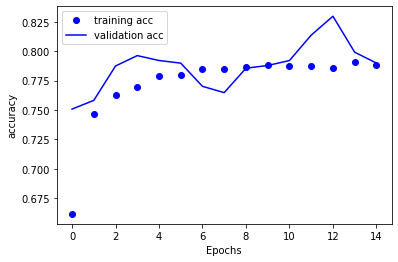

In [71]:
plt.clf()
plt.plot(range(len(average_all_acc)), average_all_acc, 'bo', label = "training acc")
plt.plot(range(len(average_all_val_acc)), average_all_val_acc, 'b', label = "validation acc")

plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [54]:
final_mode = build_model()
class_weights = {0:0.135, 1:1}
final_mode.fit(x_train, x_train_label_new, epochs=12, batch_size=512, verbose=0, class_weight=class_weights)

In [62]:
answer = final_mode.predict(x_test)
answer

0.99885404

In [72]:
output = np.zeros(len(answer))
output = output.astype("int64")

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
for i, pred_y in enumerate(answer):
    if(pred_y[0] < pred_y[1]):
        output[i] = 1
    else:
        output[i] = 0



array([0, 0, 0, ..., 0, 0, 1])

In [67]:
output = pd.DataFrame(data=output, columns=["Target"])

sub_try = pd.read_csv('sub_try.csv') 
sub_try.Target = output

output = sub_try
output.to_csv('answer.csv', index = False)